# SD201 - Lab 1
Student: José Lucas Barretto

## Section 1: Practicing with Python

In [1]:
# creates a list L of integers from 0 to 9
L = [i for i in range(10)]
print('L:', L)

# creates a list M with the square of the elements in L
M = [i**2 for i in L]
print('M:', M)

# creates a function that returns an array with the even elements of the input array
def f(L):
    M = []
    
    for i in L:
        if i % 2 == 0:
            M.append(i)
    
    return M

print('f(L) =', f(L))

# create a file with integers from 0 to 100
file = open('file.txt', 'w') # creates empty file

integers = [str(i) + '\n' for i in range(0,100)] # generates a list of integers

file.writelines(integers) # writes string to file
file.close() # close the file

# read file with integers
file = open('file.txt', 'r') # opens the file
lines = file.readlines() # reads the file lines

L = [int(i[:-1]) for i in lines] # generates integer list by removing '\n' chatacters

L_even = f(L) # check for even numbers in L
print('even numbers between 0 and 100:', L_even)
file.close() # close the file

L: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
M: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
f(L) = [0, 2, 4, 6, 8]
even numbers between 0 and 100: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


## Section 2: Implementing PageRank

### Question 1

First, let's define the graph presented in figure 1.

In [2]:
G1 = {1:[2,5], 2:[3], 3:[4], 4:[1], 5:[6], 6:[1]}

Now, we need to build some functions that will help us build the PageRank algorithm.

In [3]:
# function to generate graph edges
def genEdges(G):
    E = []
    for key in G.keys():
        for value in G[key]:
            E.append((key, value))
    
    return E

In [4]:
# function to generate the matrix M from the graph
def genM(G):
    M = []
    E = genEdges(G)
    
    for edge in E:
        j = edge[0]
        i = edge[1]
        
        out_degree = len(G[j])
        delta = 1/out_degree
        
        M.append([i, j, delta])
    
    return M

Let's use them to implement the PageRank algorithm!

In [5]:
# PageRank algorithm function
def pageRank(G, beta, eps, t):
    M = genM(G)
    
    n = len(G.keys())
    
    pi = [1/n]*n
    
    print('Starting PageRank.')
    for epoch in range(t):
        
        # a = M*pi
        a = [0]*n
        
        # sparse matrix and vector multiplication
        for i in M: 
            
            # slice to obtain matrix row, column and value
            row = i[0]
            column = i[1]
            value = i[2]
            
            # perform element wise multiplication
            a[row-1] += value * pi[column-1]
        
        # calculate new value of pi
        new_pi = [beta*value + (1-beta)/n for value in a]
        
        # calculate the norm between the new and the old pi
        norm = 0
        for i in range(n):
            norm += abs(new_pi[i] - pi[i])
        
        pi = new_pi
        
        # stop condition
        if norm < eps:
            print('PageRank converged after', epoch, 'epochs.')
            break
        
    rank = dict(zip(G.keys(), pi))
    
    return rank

We can now test the Algorithm for the graph in figure 1.

In [6]:
from pprint import pprint

print('beta = 1')
rank1 = pageRank(G1, 1, 0.1, 100)
pprint(rank1)
print('Ranking of Pages in decreasing order')
print(sorted(rank1, key=rank1.get, reverse=True))

beta = 1
Starting PageRank.
PageRank converged after 10 epochs.
{1: 0.2708333333333333,
 2: 0.13541666666666666,
 3: 0.15625,
 4: 0.14583333333333331,
 5: 0.13541666666666666,
 6: 0.15625}
Ranking of Pages in decreasing order
[1, 3, 6, 4, 2, 5]


In [7]:
print('beta = 0.8')
rank2 = pageRank(G1, 0.8, 0.1, 100)
pprint(rank2)
print('Ranking of Pages in decreasing order')
print(sorted(rank2, key=rank2.get, reverse=True))

beta = 0.8
Starting PageRank.
PageRank converged after 3 epochs.
{1: 0.2573333333333333,
 2: 0.13626666666666665,
 3: 0.15599999999999997,
 4: 0.1581333333333333,
 5: 0.13626666666666665,
 6: 0.15599999999999997}
Ranking of Pages in decreasing order
[1, 4, 3, 6, 2, 5]


We can see that the PageRank results are similar, but are not the same. This occurs because of the difference in the beta value. In the first run, beta equals 1, and, therefore, the random surfer will only surf through links from the currrent page. In the second run, beta equals 0.8, and the surfer now has a small probability of randomly jumping to any page, even if it's not connected to the current node. This causes differences in the final results, since the second run of the algorithm avoids spider traps and therefore provides a more suitable result. The convergence of the random sufer with beta=0.8 is also a lot faster -  it converged after 3 epochs, against 10 for the surfer with beta=1.

### Question 2

The first step now is to search for all the .html webpages in the webpage folder.

In [8]:
import glob

# get all filenames in the webpage folder
files = [filename for filename in glob.glob('webpages/*.html')]

# organize a dict with all filenames in alphabetical order
files.sort()
titles = [title[9:] for title in files]
code_dict = dict(zip(titles, range(1,len(files)+1))) # assigns a filename for each number
reverse_code_dict = dict(zip(range(1,len(files)+1), titles)) # assigns a number for each filename

Now that we know all the files that we have to process, we can create the graph dictionary for all the pages.

In [9]:
import re

# creates empty dict
G2 = dict()

# iterates over all the files
for file in files:

    # open file
    f = open(file, 'r')

    # obtains all links found in file through regex manipulation
    links_raw = re.findall(r'(href=' + '\"' + '[^ ]*' + '\.html\")', f.read())

    # removes duplicates by converting to set
    links_set = set(links_raw)

    # converts set to a list, removes 'href=' and quotation marks from the strings
    links = [link[6:-1] for link in links_set]

    # sorts lists
    links.sort()
    
    # builds a list with the codes for the respective links
    links_code = [code_dict[link] for link in links]
    
    # gets the filename's code number
    filename = file[9:]
    file_code = code_dict[filename]
    
    
    # removes selfloops from link list
    try:
        links_code.remove(file_code)
    except ValueError:
        pass
    
    # updates dict with filename (without 'webpages/') and its links
    G2.update({file_code : links_code})

    # closes file
    f.close()

Let's use the page rank algorithm with beta=0.8 and analyse the results.

In [10]:
# run PageRank for the webpage graph
rank = pageRank(G2, 0.8, 0.01, 100)

# print PageRank results in decreasing order and store results in a dict
result = {}

print('\nRanking of Pages in decreasing order:\n')
for number in sorted(rank, key=rank.get, reverse=True):
    result[reverse_code_dict[number]] = rank[number]
    print(reverse_code_dict[number], ':{:.4f}'.format(rank[number]))

Starting PageRank.
PageRank converged after 3 epochs.

Ranking of Pages in decreasing order:

Programming_language.html :0.0449
C_(programming_language).html :0.0380
Assembly_language.html :0.0363
Operating_system.html :0.0338
Java_(programming_language).html :0.0322
Compiler.html :0.0305
C++.html :0.0287
Object-oriented_programming.html :0.0280
Lisp_(programming_language).html :0.0267
Python_(programming_language).html :0.0258
JavaScript.html :0.0238
Fortran.html :0.0231
Virtual_machine.html :0.0231
Computer_science.html :0.0229
High-level_programming_language.html :0.0228
COBOL.html :0.0222
Imperative_programming.html :0.0221
Computer.html :0.0218
Computer_hardware.html :0.0209
Computer_program.html :0.0201
Source_code.html :0.0200
Type_system.html :0.0196
Data_type.html :0.0189
Instruction_set.html :0.0186
Unix.html :0.0183
Scripting_language.html :0.0174
Subroutine.html :0.0169
GNU_Compiler_Collection.html :0.0165
Object_(computer_science).html :0.0161
Comparison_of_programming_lan

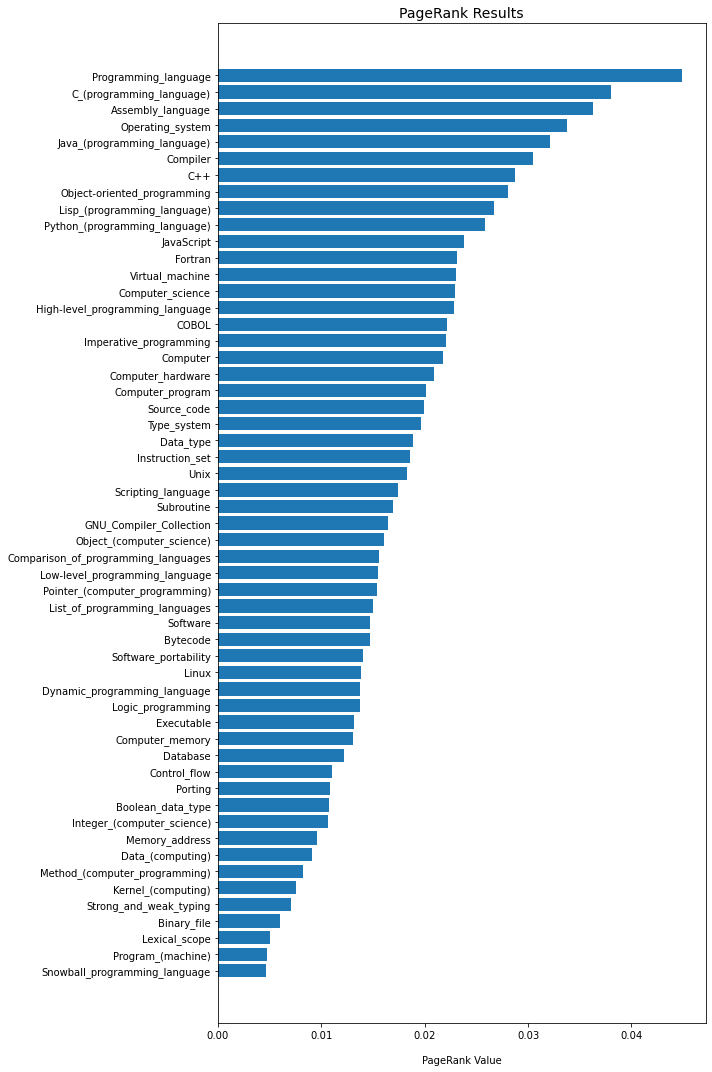

In [35]:
# plot page rank results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,15))

# remove '.html' from label string
labels = [key[:-5] for key in result.keys()]

# plot results
ax.barh(labels, result.values())
ax.set_xlabel('PageRank Value', labelpad=15)
ax.set_title('PageRank Results', fontsize=14)
fig.tight_layout()
plt.gca().invert_yaxis()

fig.tight_layout()
plt.show()

### Question 3

In [12]:
# this function completely removes a node from a graph
def deleteNode(G, node):
    
    # removes all edges connecting to that node
    for key, values in list(G.items()):
        if node in values:
            values.remove(node)
        G[key] = values
    
    # removes the node
    del G[node]

# this function removes all dead ends from the graph
def removeDeadEnds(G):
    change = True
    
    # repeat until there are no dead ends
    while change:
        change = False
        
        # find dead ends
        for key, values in list(G.items()):
        
            if len(values) == 0:
                deleteNode(G, key)
                change = True

Now, let's test the function on the following graph (red nodes are dead-ends):

![A Graph with Dead-Ends.](graph_dead_ends.png)

In [36]:
G3 = {1:[2,5], 2:[3], 3:[4], 4:[1,8], 5:[6,7], 6:[1,7], 7:[], 8:[9], 9:[10,11], 10:[], 11:[]}
removeDeadEnds(G3)
print(G3)

{1: [2, 5], 2: [3], 3: [4], 4: [1], 5: [6], 6: [1]}
